In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import torch,torch.utils.data
import gzip
import pickle

#### Loading data

Using part of the code from the 'lecture_data' script

In [2]:
data = pickle.load(gzip.open('mnist.pkl.gz'),encoding='latin1')
train_data = data[0][0]
train_data_label = data[0][1]
test_data = data[1][0]
test_data_label = data[1][1]

#### Visualise some data

Visualising some images with the corresponding label to check if all is good

In [3]:
def display_img(img, lab):
    lab = np.argmax(lab)
    plt.figure()
    plt.imshow(img.reshape((28, 28)), interpolation='nearest', cmap='binary')
    plt.title('label: ' + str(lab))

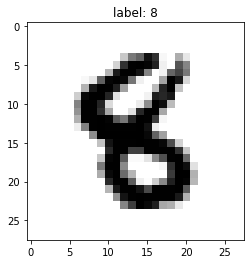

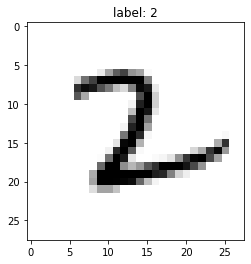

In [4]:
for i in range(2):
    display_img(test_data[i], test_data_label[i])

#### Parameters

Parameters of the network

In [5]:
learning_rate = .01
epochs = 1
nb_entries = len(train_data[0])                          # 784
# Number of hidden neurons, arbitrary number
nb_neurons_c = 128                                       # 26
# Number of output neurons = number of classes
nb_neurons_s = len(train_data_label[0])                  # 10
# Weights of the hidden layer
w_c = np.zeros((nb_neurons_c, nb_entries))               # w_c: (26, 784)
# Weights of the output layer
w_s = np.random.randn(nb_neurons_s, nb_neurons_c)        # w_s: (10, 26)
# Biases of the hidden layer
b_c = np.zeros((nb_neurons_c))                           # b_c: (26)
# Biases of the output layer
b_s = np.random.randn(nb_neurons_s)                      # b_s: (10)

#### Perceptron implementation

We define the 'fit' function that we can call to fit the network to the training data.

We can then call predict to check the accuracy on the test data.

In [6]:
def sigmoid(y):
    return 1. / (1. + np.exp(-y))

def der_sigmoid(y):
    return np.multiply(y, (1 - y))

In [7]:
def fit():
    global w_c, w_s, b_c, b_s
    # For all epochs (one epoch is an iteration through the whole training set)
    for i in range(epochs):
        # For each training item, x is the image and t is the corresponding label
        for x, t in zip(train_data, train_data_label):
            # Compute the output of each hidden neuron
            y_c = sigmoid(np.dot(w_c, x) + b_c)          # w_c: (26, 784), x: (784,), b_c: (26,), y_c: (26,)
            # Compute the output of each output neuron
            y_s = np.dot(w_s, y_c) + b_s                 # w_s: (10, 26), y_c: (26,), b_s: (10,), y_s: (10,)
            # Compute the error of the output layer
            e_s = t - y_s                                # e_s: (10,)
            # Compute the error of the hidden layer
            e_c = der_sigmoid(y_c) * np.dot(e_s, w_s)    # y_c: (10,), e_s: (10,), w_s: (10, 26), e_c: (26,)
            
            # Create a matrix containing the input image by the number of hidden neurons
            # The matrix is transposed
            m_c = np.transpose([x] * nb_neurons_c)       # m_c: (784, 26)
            # Compute the delta that will be add to the weights
            dw_c = learning_rate * m_c * e_c           # m_c: (784, 26), e_c: (26,), dw_c: (784, 26)
            # Add the delta to the weights
            w_c += np.transpose(dw_c)                    # w_c: (26, 784)
            b_c += learning_rate * e_c
            
            # Create a matrix containing the input of the output layer (y_c) by the number of output neurons
            # The matrix is transposed so we can multiply it to a (10,) vector
            m_s = np.transpose([y_c] * nb_neurons_s)     # m_s: (26, 10)
            # Compute the delta that will be add to the weights
            dw_s = learning_rate * m_s * e_s           # m_s: (26, 10), e_s: (10,), dw_s: (26, 10)
            # Add the delta to the weights
            w_s += np.transpose(dw_s)                    # w_s: (10, 26)
            #b_s += learning_rate * e_s

In [8]:
def predict():
    accuracy = 0
    # For each test item
    for x, t in zip(test_data, test_data_label):
        # Compute the output of each hidden neuron
        y_c = sigmoid(np.dot(w_c, x) + b_c)              # w_c: (26, 784), x: (784,), b_c: (26,), y_c: (26,)
        # Compute the output of each output neuron
        y_s = np.dot(w_s, y_c) + b_s                     # w_s: (10, 26), y_c: (26,), b_s: (10,), y_s: (10,)
        # Compare the desired output with the predicted one 
        accuracy += np.argmax(y_s) == np.argmax(t)
    # Return the accuracy of the network on the test set
    return accuracy / len(test_data)

In [9]:
fit()

In [10]:
print('Accuracy: ' + str(predict()))

Accuracy: 0.9254285714285714
